In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial

# Set the float format to prevent scientific notation
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)

ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data_updatedsums.csv') #ma_ntl_data

ma = ma[ma['avg_ntl'] != '#DIV/0!']
ma['avg_ntl'] = ma['avg_ntl'].astype(float)
ma['total_population'] = pd.to_numeric(ma['total_population'], errors='coerce')
ma = ma.dropna(subset=['total_population'])
ma['total_population'] = ma['total_population'].astype(float)
values_to_drop = ['west pgs', 'New District', 'New Districtffff', 'Sadaruru']
# Dropping rows with specified values in the 'District' column
ma = ma[~ma['District'].isin(values_to_drop)]

meg = ma.copy()
meg["ntl_pc"]= meg['avg_ntl']/meg['total_population']
meg['ntl_adm']= 0.0 
meg["ntl_edu"]= 0.0 
meg["ntl_med"]= 0.0 
meg["ntl_adm"]= meg['avg_ntl'] * 0.0522
meg["ntl_edu"]= meg['avg_ntl'] * 0.0395
meg["ntl_med"]= meg['avg_ntl'] * 0.0098

meg["ntl_pc"]= meg['avg_ntl']/meg['total_population']
meg["ntl_pc_adm"]= meg['ntl_adm']/meg['total_population']
meg["ntl_pc_edu"]= meg['ntl_edu']/meg['total_population']
meg["ntl_pc_med"]= meg['ntl_med']/meg['total_population']


/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_90874/1707683200.py:13: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data_updatedsums.csv') #ma_ntl_data


In [33]:
agro_max = meg['agro'].max()
print(agro_max)
edu_max = ma['edu'].max()
print(edu_max)
med_max = ma['med'].max()
print(med_max)
transportadmin_max = ma['transportadmin'].max()
print(transportadmin_max)

12
5
5
4


## Subdist Level

In [34]:
mer_sub = meg.groupby(['Subdistrict','District','District_code','State']).agg({'avg_ntl': 'sum', 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','road':'sum','area_sq_km':'sum'}).reset_index()
mer_sub['avg_ntl'] = mer_sub['avg_ntl'].astype(float)
mer_sub = mer_sub.rename(columns={'avg_ntl': 'subdist_ntl', 'total_population': 'subdist_population',
                                  'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum',
                                  'transportadmin':'subdist_transportadmin_sum','area_sq_km':'subdist_area',
                                  'road':'villages_road'})
mer_sub['dist_ntl_pc'] = mer_sub['subdist_ntl']/mer_sub['subdist_population']
mer_all_sub = pd.merge(meg, mer_sub, on=['Subdistrict','District','District_code','State'], how='outer')
mer_all_sub['pop_share'] = mer_all_sub['total_population']/mer_all_sub['subdist_population']
mer_all_sub

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,subdist_area,dist_ntl_pc,pop_share
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,0,0,0,0,56.69000,0,0,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,14.00000,1,1,0,0,0,1,1,17.00000,4.00000,0,0,0,0.00000,0,0,1,0,0,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,1,0,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,0.11152,0.08439,0.02094,1252.59829,48692.00000,137,100,71,57,87,

In [35]:
sub_sorted = mer_all_sub.sort_values(by=['District', 'Subdistrict','ntl_pc'])
sub_sorted['Index'] = sub_sorted.groupby('Subdistrict').cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
sub_sorted['Max_Len'] = sub_sorted.groupby('Subdistrict')['Index'].transform('max')
sub_sorted

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,subdist_area,dist_ntl_pc,pop_share,Index,Max_Len
498009,4.44351,4.90339,4.99293,5.41471,4.78350,3.60352,2.24898,2.60787,0.00000,4.04546,5.34326,4.02563,4.21934,4.44351,NORTH TWENTY FOUR PARGAN*,19.00000,WESTBENGAL,19.00000,303.00000,24 PARAGANAS NORTH,337.00000,2322.00000,Amdanga,2322.00000,322989.00000,Harapur,2723.00000,AMDANGA,19.00000,WEST BENGAL,303.00000,24 PARAGANAS NORTH,2322.00000,Amdanga,2723.00000,AMDANGA,107782.00000,MARICHA,Harapur,743711.00000,227.00000,1917.00000,NaN,2285.00000,1163.00000,1122.00000,437.00000,81.00000,45.00000,0,0,0,0,52.00000,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,127.00000,1,1,0,0,1,1,1,61.00000,3.00000,0,0,0,0.00000,0,0,0,0,0,1,1,62.00000,22.00000,37.00000,22.00000,0.00000,3.00000,0.00000,0.00000,34.00000,28.00000,42.00000,1,0,37.00000,22.00000,Haringhata,5.66798,1.25462,0,1,2,1,2,0,0.00185,0.22025,0.16666,0.04135,0.00010,0.00007,0.00002,1133.67593,220019.00000,97,132,127,65,144,165.84871,0.00515,0.01039,1,78
498008

In [36]:
columns_to_keep = ['Subdistrict', 'District', 'District_code', 'State', 'subdist_agro_sum', 'subdist_med_sum',
       'subdist_edu_sum', 'subdist_transportadmin_sum','villages_road','subdist_area']

# Create a new DataFrame with only the selected columns
filter_sub = mer_sub[columns_to_keep]
filter_sub 

,Subdistrict,District,District_code,State,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,subdist_area
0,A.Konduru,KRISHNA,547.00000,ANDHRA PRADESH,66,52,42,35,35,66.57653
1,ADILABAD URBAN,ADILABAD,532.00000,TELANGANA,1,1,1,1,1,1.74309
2,AIDILABAD RURAL,ADILABAD,532.00000,TELANGANA,36,46,56,23,52,95.19240
3,ANANDPURI,BANSWARA,125.00000,RAJASTHAN,162,191,246,72,225,250.06270
4,ANTHERGAON,PEDDAPALLI,0.00000,TELANGANA,54,32,29,22,33,43.85376
...,...,...,...,...,...,...,...,...,...,...
5594,pisimoni,Anirban,0.00000,WESTBENGAL,10,15,22,24,12,24.26537
5595,singhsingh,viewnew,0.00000,ANDHRA PRADESH,93,100,80,49,79,117.59500
5596,subdistrict new,ALLAHABAD,175.00000,UTTAR PRADESH,1,1,1,1,2,1.61134
5597,veppur,CUDDALORE,617.00000,TAMIL NADU,5,4,4,3,2,1.43577


In [37]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale = sub_sorted.groupby(['Subdistrict','District','District_code','State',
                          'subdist_ntl','subdist_population',
                          'dist_ntl_pc']).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale.columns = ['Subdistrict','District','District_code','State','subdist_ntl',
               'subdist_population','dist_ntl_pc','sum_y','numerator', 'num','alesina']
ale

# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

,Subdistrict,District,District_code,State,subdist_ntl,subdist_population,dist_ntl_pc,sum_y,numerator,num,alesina
0,A.Konduru,KRISHNA,547.00000,ANDHRA PRADESH,1562.69600,48612.00000,0.03215,0.92292,6.12607,22.00000,0.44203
1,ADILABAD URBAN,ADILABAD,532.00000,TELANGANA,10.55057,538.00000,0.01961,0.01961,0.01961,1.00000,0.00000
2,AIDILABAD RURAL,ADILABAD,532.00000,TELANGANA,1105.03880,32664.00000,0.03383,1.62243,17.07848,34.00000,0.41021
3,ANANDPURI,BANSWARA,125.00000,RAJASTHAN,1295.66706,157564.00000,0.00822,1.04621,48.86107,122.00000,0.24257
4,ANTHERGAON,PEDDAPALLI,0.00000,TELANGANA,1156.18224,22562.00000,0.05124,0.97772,5.33485,17.00000,0.41689
...,...,...,...,...,...,...,...,...,...,...,...
5594,pisimoni,Anirban,0.00000,WESTBENGAL,4233.69165,127107.00000,0.03331,0.19870,0.50546,6.00000,0.31872
5595,singhsingh,viewnew,0.00000,ANDHRA PRADESH,2270.92356,64319.00000,0.03531,2.39675,29.41035,61.00000,0.61407
5596,subdistrict new,ALLAHABAD,175.00000,UTTAR PRADESH,25.33902,1011.00000,0.02506,0.02506,0.02506,1.00000,0.00000
5597,veppur,CUDDALORE,617.00000,TAMIL NADU,48.19620,4453.00000,0.01082,0.01082,0.01082,1.00000,0.00000


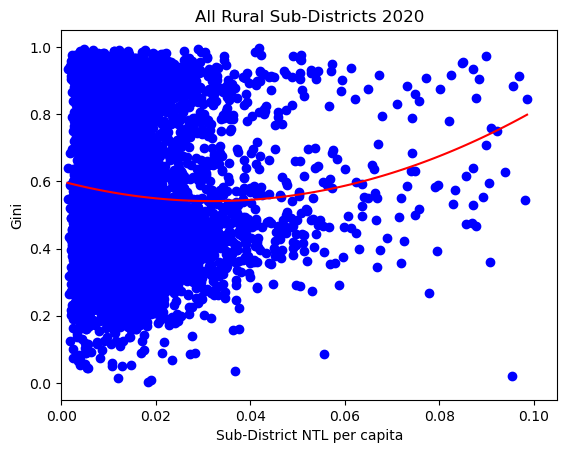

In [10]:

# ale['alesina'] = ale['alesina'].apply(lambda x: x * -1 if x < 0 else x)
# ale = ale[ale['dist_ntl_pc'] <= 0.1]
# ale = ale[ale['alesina'] > 0]

# Create a scatterplot
plt.scatter(ale['dist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['dist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['dist_ntl_pc']), max(ale['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
plt.xlim(0,0.105)
plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

In [6]:
print(ale['subdist_population'].mean())
print(ale['subdist_population'].median())
print(ale['subdist_population'].max())
print(ale['subdist_population'].min())
print(ale['num'].mean())
print(ale['num'].median())
print(ale['num'].max())
print(ale['num'].min())

169992.57903197
126705.0
1506987.0
142.0
106.83425611716378
76.0
1599.0
1.0


In [38]:
panel = pd.merge(ale, filter_sub, on=['Subdistrict','District','District_code','State'], how='right')
# panel = panel[panel['dist_ntl_pc'] <= 0.04]
# panel = panel[panel['alesina'] > 0]

panel

,Subdistrict,District,District_code,State,subdist_ntl,subdist_population,dist_ntl_pc,sum_y,numerator,num,alesina,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,subdist_area
0,A.Konduru,KRISHNA,547.00000,ANDHRA PRADESH,1562.69600,48612.00000,0.03215,0.92292,6.12607,22.00000,0.44203,66,52,42,35,35,66.57653
1,ADILABAD URBAN,ADILABAD,532.00000,TELANGANA,10.55057,538.00000,0.01961,0.01961,0.01961,1.00000,0.00000,1,1,1,1,1,1.74309
2,AIDILABAD RURAL,ADILABAD,532.00000,TELANGANA,1105.03880,32664.00000,0.03383,1.62243,17.07848,34.00000,0.41021,36,46,56,23,52,95.19240
3,ANANDPURI,BANSWARA,125.00000,RAJASTHAN,1295.66706,157564.00000,0.00822,1.04621,48.86107,122.00000,0.24257,162,191,246,72,225,250.06270
4,ANTHERGAON,PEDDAPALLI,0.00000,TELANGANA,1156.18224,22562.00000,0.05124,0.97772,5.33485,17.00000,0.41689,54,32,29,22,33,43.85376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,pisimoni,Anirban,0.00000,WESTBENGAL,4233.69165,127107.00000,0.03331,0.19870,0.50546,6.00000,0.31872,10,15,22,24,12,24.26537
5595,singhsingh,viewnew,0.00000,ANDHRA PRADESH,2270.92356,64319.00000,0.03531,2.39675,29.41035,61.00000,0.61407,93,100,80,49,79,117.59500
5596,subdistrict new,ALLAHABAD,175.00000,UTTAR PRADESH,25.33902,1011.00000,0.02506,0.02506,0.02506,1.00000,0.00000,1,1,1,1,2,1.61134
5597,veppur,CUDDALORE,617.00000,TAMIL NADU,48.19620,4453.00000,0.01082,0.01082,0.01082,1.00000,0.00000,5,4,4,3,2,1.43577


## Dist Level

In [13]:
meg_dist = meg.groupby(['District','District_code','State']).agg({'avg_ntl': 'sum', 'total_population': 'sum',
                                                                  'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','area_sq_km':'sum'}).reset_index()
meg_dist['avg_ntl'] = meg_dist['avg_ntl'].astype(float)
meg_dist = meg_dist.rename(columns={'avg_ntl': 'dist_ntl', 'total_population': 'dist_population',
                                    'agro':'dist_agro_sum','med':'dist_med_sum','edu':'dist_edu_sum','transportadmin':'dist_transportadmin_sum','area_sq_km':'dist_area'})
meg_dist['dist_ntl_pc'] = meg_dist['dist_ntl']/meg_dist['dist_population']

total_population_sum = meg_dist['dist_population'].sum()
print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 951788450.0


In [17]:
meg_all_dist = pd.merge(meg, meg_dist, on=['District','District_code','State'], how='outer')

meg_all_dist['pop_share'] = meg_all_dist['total_population']/meg_all_dist['dist_population']
# meg_all_dist
meg_sorted = meg_all_dist.sort_values(by=['District', 'ntl_pc'])
meg_sorted['Index'] = meg_sorted.groupby('District').cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
meg_sorted['Max_Len'] = meg_sorted.groupby('District')['Index'].transform('max')
meg_sorted

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,dist_ntl,dist_population,dist_agro_sum,dist_med_sum,dist_edu_sum,dist_transportadmin_sum,dist_area,dist_ntl_pc,pop_share,Index,Max_Len
484031,5.02964,5.68600,7.06972,9.13299,5.17173,4.25210,2.42268,4.88502,0.00000,5.22681,7.63235,6.20866,5.70161,5.22681,NORTH TWENTY FOUR PARGAN*,19.00000,WESTBENGAL,19.00000,303.00000,24 PARAGANAS NORTH,337.00000,2331.00000,Haroa,2331.00000,323679.00000,Kuchhia Mora,2737.00000,HAROA,19.00000,WEST BENGAL,303.00000,24 PARAGANAS NORTH,2331.00000,Haroa,2737.00000,HAROA,107918.00000,SONAPUKUR SANKARPUR,Kuchhia Mora,743425.00000,228.00000,1929.00000,na,18890.00000,948.00000,942.00000,439.00000,305.00000,132.00000,0,0,0,0,32.88000,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0.00000,1,1,0,0,1,1,1,144.00000,4.00000,0,0,0,0.00000,0,0,0,0,0,1,1,84.00000,84.00000,0.00000,84.00000,84.00000,0.00000,0.00000,0.00000,61.00000,23.00000,270.00000,1,0,84.00000,84.00000,Haroa,4.45451,1.67305,2,1,2,1,2,1,0.00030,0.29762,0.22521,0.05588,0.00002,0.00001,0.00000,27768.72298,5979790.00000,2282,2702,2713,1805,3311.17266,0.00464,0.00316,1,1563
484450,0.59318,0.89845,0.77426,0.79289,0.62309,0.49330,0.700

In [15]:
columns_to_keep = ['District', 'District_code', 'State', 'subdist_agro_sum', 'subdist_med_sum',
       'subdist_edu_sum', 'subdist_transportadmin_sum','subdist_area']

# Create a new DataFrame with only the selected columns
filter_dist = mer_sub[columns_to_keep]
filter_dist 

,District,District_code,State,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,subdist_area
0,KRISHNA,547.00000,ANDHRA PRADESH,66,52,42,35,66.57653
1,ADILABAD,532.00000,TELANGANA,1,1,1,1,1.74309
2,ADILABAD,532.00000,TELANGANA,36,46,56,23,95.19240
3,BANSWARA,125.00000,RAJASTHAN,162,191,246,73,250.06270
4,PEDDAPALLI,0.00000,TELANGANA,54,32,29,23,43.85376
...,...,...,...,...,...,...,...,...
5594,Anirban,0.00000,WESTBENGAL,10,15,22,28,24.26537
5595,viewnew,0.00000,ANDHRA PRADESH,93,100,80,49,117.59500
5596,ALLAHABAD,175.00000,UTTAR PRADESH,1,1,1,1,1.61134
5597,CUDDALORE,617.00000,TAMIL NADU,5,4,4,3,1.43577


In [16]:

def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# Calculate WCV for each state using groupby and apply
all = meg_sorted.groupby(['District','District_code','State',
                          'dist_ntl','dist_population',
                          'dist_ntl_pc']).apply(calculate_alesina).reset_index()

# Reset the index and rename the result column
all.columns = ['District','District_code','State','dist_ntl',
               'dist_population','dist_ntl_pc','sum_y','numerator', 'num','alesina']


all

,District,District_code,State,dist_ntl,dist_population,dist_ntl_pc,sum_y,numerator,num,alesina
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,27768.72298,5979790.00000,0.00464,68.41514,3478.54972,1563.00000,0.93558
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,35600.34826,8740691.00000,0.00407,39.60789,6188.25534,2031.00000,0.84664
2,ADILABAD,532.00000,TELANGANA,14509.40529,557344.00000,0.02603,71.87995,3159.57109,509.00000,0.82925
3,AGAR MALWA,0.00000,MADHYA PRADESH,7963.81906,504286.00000,0.01579,8.18986,1238.25226,437.00000,0.31033
4,AGRA a,146.00000,UTTAR PRADESH,24309.54446,2669545.00000,0.00911,70.18014,1825.49076,720.00000,0.92913
...,...,...,...,...,...,...,...,...,...,...
587,YAVATMAL,510.00000,MAHARASHTRA,39435.12096,2166418.00000,0.01820,1501.15943,62798.81702,1888.00000,0.95621
588,demoz,0.00000,ANDHRA PRADESH,478.78793,60945.00000,0.00786,1.83225,67.93247,139.00000,0.47373
589,rewa a,0.00000,UTTAR PRADESH,24145.74876,3116857.00000,0.00775,14.69595,4914.19646,1282.00000,0.47911
590,test dist,0.00000,ANDHRA PRADESH,59767.31391,2217985.00000,0.02695,145.61037,14037.98942,1200.00000,0.84015


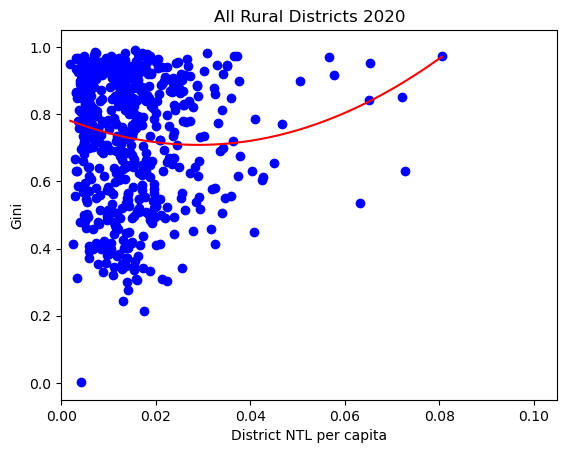

In [22]:
# all = all[all['dist_ntl_pc'] <= 0.1]
# all = all[all['alesina'] > 0]

# Create a scatterplot
plt.scatter(all['dist_ntl_pc'], all['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(all['dist_ntl_pc'], all['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(all['dist_ntl_pc']), max(all['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
plt.xlim(0,0.105)
plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

In [107]:
dist_panel = pd.merge(all, filter_dist, on=['District','District_code','State'], how='right')
dist_panel = dist_panel[dist_panel['dist_ntl_pc'] <= 0.04]
dist_panel = dist_panel[dist_panel['alesina'] > 0]

dist_panel

,District,District_code,State,dist_ntl,dist_population,dist_ntl_pc,sum_y,numerator,num,alesina,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,subdist_area
0,KRISHNA,547.00000,ANDHRA PRADESH,55988.11300,3125248.00000,0.01791,36.26277,7241.50989,1072.00000,0.62837,66,52,43,58,66.57653
1,ADILABAD,532.00000,TELANGANA,14509.40529,557344.00000,0.02603,71.87995,3159.57109,509.00000,0.82925,1,1,1,2,1.74309
2,ADILABAD,532.00000,TELANGANA,14509.40529,557344.00000,0.02603,71.87995,3159.57109,509.00000,0.82925,36,46,57,33,95.19240
3,BANSWARA,125.00000,RAJASTHAN,15645.19904,1610021.00000,0.00972,18.90127,4699.88338,1166.00000,0.57435,162,191,255,194,250.06270
4,PEDDAPALLI,0.00000,TELANGANA,18244.61950,498939.00000,0.03657,323.82587,1443.32547,281.00000,0.97184,54,32,30,42,43.85376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,Anirban,0.00000,WESTBENGAL,14512.13259,1347762.00000,0.01077,6.22205,122.03761,247.00000,0.84523,10,15,23,38,24.26537
5595,viewnew,0.00000,ANDHRA PRADESH,73165.98410,3346483.00000,0.02186,40.14118,12351.39720,1210.00000,0.49223,93,100,86,85,117.59500
5596,ALLAHABAD,175.00000,UTTAR PRADESH,37238.20649,5397567.00000,0.00690,247.20266,18924.57585,2447.00000,0.93784,1,1,1,1,1.61134
5597,CUDDALORE,617.00000,TAMIL NADU,20169.30671,1986833.00000,0.01015,21.11227,2004.71594,775.00000,0.75625,5,4,4,7,1.43577


In [91]:
# dist_panel.to_csv('/Users/sid/Desktop/2020distdata.csv',index=False)

## WCV

### Sub-District

In [39]:
mer_all_sub['Index'] = mer_all_sub.groupby('Subdistrict').cumcount() + 1
mer_all_sub['Max_Len'] = mer_all_sub.groupby('Subdistrict')['Index'].transform('max')
mer_all_sub

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,subdist_area,dist_ntl_pc,pop_share,Index,Max_Len
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,0,0,0,0,56.69000,0,0,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,14.00000,1,1,0,0,0,1,1,17.00000,4.00000,0,0,0,0.00000,0,0,1,0,0,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,1,0,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,0.11152,0.08439,0.02094,1252.59829,48692.00000,137

In [40]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['dist_ntl_pc'].mean()
    numerator = (group['pop_share'] * ((group['ntl_pc'])**2)).sum()
    num = group['Max_Len'].max()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) /bar_y
    return pd.Series ([numerator, wcv,num])

# Calculate WCV for each state using groupby and apply
wcv = mer_all_sub.groupby(['Subdistrict','District','District_code','State',
                           'subdist_ntl','subdist_population',
                           'dist_ntl_pc']).apply(calculate_wcv).reset_index()

# Reset the index and rename the result column
wcv.columns = ['Subdistrict','District','District_code','State', 'subdist_ntl','subdist_population',
               'dist_ntl_pc', 'numer','WCV','num']
wcv

,Subdistrict,District,District_code,State,subdist_ntl,subdist_population,dist_ntl_pc,numer,WCV,num
0,A.Konduru,KRISHNA,547.00000,ANDHRA PRADESH,1562.69600,48612.00000,0.03215,0.00196,1.37760,22.00000
1,ADILABAD URBAN,ADILABAD,532.00000,TELANGANA,10.55057,538.00000,0.01961,0.00038,1.00000,1.00000
2,AIDILABAD RURAL,ADILABAD,532.00000,TELANGANA,1105.03880,32664.00000,0.03383,0.00162,1.18957,34.00000
3,ANANDPURI,BANSWARA,125.00000,RAJASTHAN,1295.66706,157564.00000,0.00822,0.00008,1.10325,122.00000
4,ANTHERGAON,PEDDAPALLI,0.00000,TELANGANA,1156.18224,22562.00000,0.05124,0.00434,1.28533,17.00000
...,...,...,...,...,...,...,...,...,...,...
5594,pisimoni,Anirban,0.00000,WESTBENGAL,4233.69165,127107.00000,0.03331,0.00130,1.08316,6.00000
5595,singhsingh,viewnew,0.00000,ANDHRA PRADESH,2270.92356,64319.00000,0.03531,0.00409,1.81229,61.00000
5596,subdistrict new,ALLAHABAD,175.00000,UTTAR PRADESH,25.33902,1011.00000,0.02506,0.00063,1.00000,1.00000
5597,veppur,CUDDALORE,617.00000,TAMIL NADU,48.19620,4453.00000,0.01082,0.00012,1.00000,1.00000


In [41]:
wcvc = pd.merge(wcv, mer_sub, on=['Subdistrict','District','District_code','State','dist_ntl_pc'], how='left')

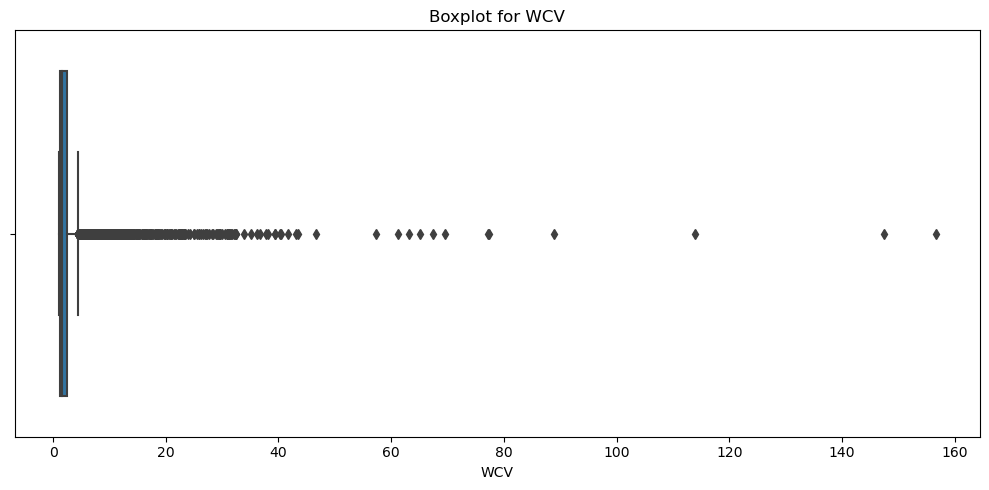

The upper whisker value is: 4.3918
The upper whisker value is: -0.6549


In [51]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=wcvc, x='WCV', orient='h')
plt.title('Boxplot for WCV')

# Calculate whisker values
q1 = wcvc['WCV'].quantile(0.25)
q3 = wcvc['WCV'].quantile(0.75)
iqr = q3 - q1
upper_whisker_ntl = q3 + 1.5 * iqr
lower_whisker_ntl = q1 - 1.5 * iqr

# Add whisker values to the plot
# plt.text(1, upper_whisker, f'Upper Whisker: {upper_whisker_ntl:.4f}', ha='left', va='bottom', color='red')
# plt.text(1, lower_whisker, f'Lower Whisker: {lower_whisker_ntl:.4f}', ha='right', va='top', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

print(f"The upper whisker value is: {upper_whisker_ntl:.4f}")
print(f"The upper whisker value is: {lower_whisker_ntl:.4f}")

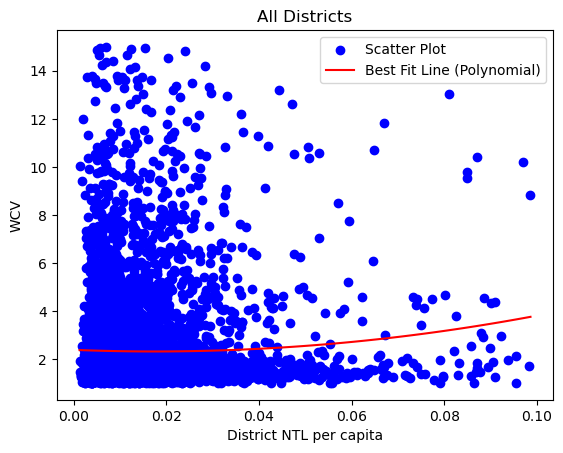

In [48]:
# wcvc = wcvc[wcvc['dist_ntl_pc'] <= 0.1]
# wcvc = wcvc[wcvc['WCV'] <= 15]
# wcvc = wcvc[wcvc['WCV'] > 0]

# Create a scatterplot
plt.scatter(wcvc['dist_ntl_pc'], wcvc['WCV'], label='Scatter Plot', color='blue', marker='o')
# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['dist_ntl_pc'], wcvc['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['dist_ntl_pc']), max(wcvc['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()
# Display the plot
plt.show()


In [42]:
panel_w = pd.merge(wcv, filter_sub, on=['Subdistrict','District','District_code','State'], how='right')

# panel_w.to_csv('/Users/sid/Desktop/panel_WCV_2020.csv',index=False)


## Theil Index

In [43]:
def calculate_theil(group):
    yi = group['ntl_pc']/group['dist_ntl_pc']
    mu = (group['ntl_pc']*group['pop_share']).sum()
    t0 = mu/group['ntl_pc']
    # the = (group['pop_share']*yi*np.log(yi)).sum()
    the = (group['pop_share']*np.log(t0)).sum()
    num = group['Max_Len'].max()
    return pd.Series(the)

thei = sub_sorted.groupby(['Subdistrict','District','District_code','State','subdist_ntl','subdist_population','dist_ntl_pc',"Max_Len"]).apply(calculate_theil).reset_index()

thei.columns = ['Subdistrict','District','District_code','State','subdist_ntl',
               'subdist_population','dist_ntl_pc','num','theil']

thei

,Subdistrict,District,District_code,State,subdist_ntl,subdist_population,dist_ntl_pc,num,theil
0,A.Konduru,KRISHNA,547.00000,ANDHRA PRADESH,1562.69600,48612.00000,0.03215,22,0.30136
1,ADILABAD URBAN,ADILABAD,532.00000,TELANGANA,10.55057,538.00000,0.01961,1,0.00000
2,AIDILABAD RURAL,ADILABAD,532.00000,TELANGANA,1105.03880,32664.00000,0.03383,34,0.13667
3,ANANDPURI,BANSWARA,125.00000,RAJASTHAN,1295.66706,157564.00000,0.00822,122,0.13947
4,ANTHERGAON,PEDDAPALLI,0.00000,TELANGANA,1156.18224,22562.00000,0.05124,17,0.23669
...,...,...,...,...,...,...,...,...,...
5594,pisimoni,Anirban,0.00000,WESTBENGAL,4233.69165,127107.00000,0.03331,6,0.10768
5595,singhsingh,viewnew,0.00000,ANDHRA PRADESH,2270.92356,64319.00000,0.03531,61,0.82707
5596,subdistrict new,ALLAHABAD,175.00000,UTTAR PRADESH,25.33902,1011.00000,0.02506,1,0.00000
5597,veppur,CUDDALORE,617.00000,TAMIL NADU,48.19620,4453.00000,0.01082,1,0.00000


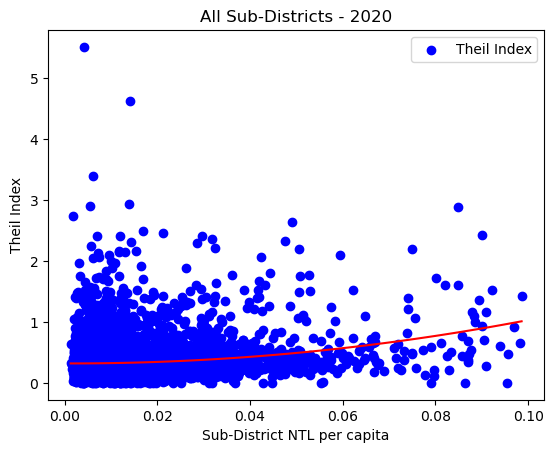

In [37]:
# thei = thei[thei['dist_ntl_pc'] <= 0.1]
# Create a scatterplot
plt.scatter(thei['dist_ntl_pc'], thei['theil'], label='Theil Index', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Theil Index")
plt.title("All Sub-Districts - 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(thei['dist_ntl_pc'], thei['theil'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(thei['dist_ntl_pc']), max(thei['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')

# plt.ylim(0, 1)

# Add a legend
plt.legend()
# Display the plot
plt.show()

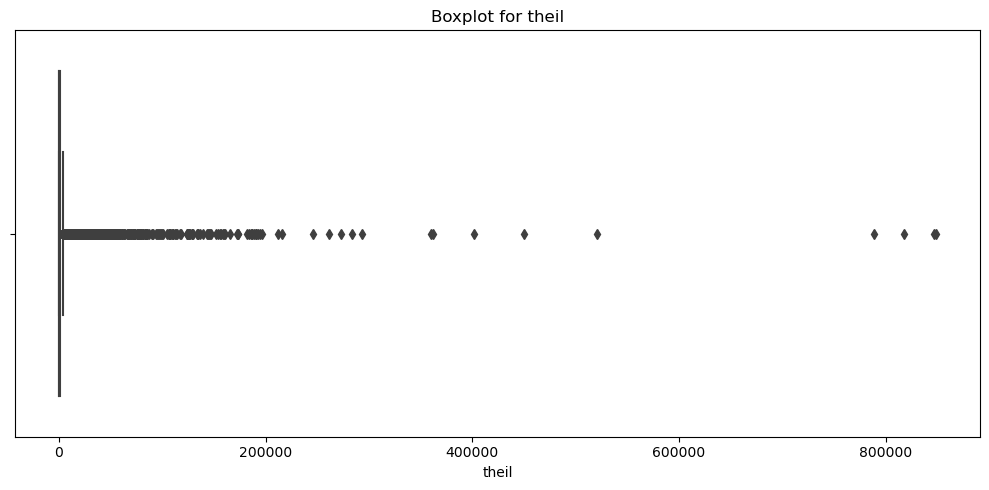

The upper whisker value is: 3839.5093
The upper whisker value is: -2254.8625


In [265]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=thei, x='theil', orient='h')
plt.title('Boxplot for theil')

# Calculate whisker values
q1 = thei['theil'].quantile(0.25)
q3 = thei['theil'].quantile(0.75)
iqr = q3 - q1
upper_whisker_ntl = q3 + 1.5 * iqr
lower_whisker_ntl = q1 - 1.5 * iqr

# Add whisker values to the plot
# plt.text(1, upper_whisker, f'Upper Whisker: {upper_whisker_ntl:.4f}', ha='left', va='bottom', color='red')
# plt.text(1, lower_whisker, f'Lower Whisker: {lower_whisker_ntl:.4f}', ha='right', va='top', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

print(f"The upper whisker value is: {upper_whisker_ntl:.4f}")
print(f"The upper whisker value is: {lower_whisker_ntl:.4f}")

In [44]:
panel_t = pd.merge(thei, filter_sub, on=['Subdistrict','District','District_code','State'], how='right')
# panel_t = panel_t[panel_t['dist_ntl_pc'] <= 0.0351]
# panel_t = panel_t[panel_t['theil'] > 1]

# panel_t.to_csv('/Users/sid/Desktop/panel_theil_2020.csv',index=False)


## OECD

In [274]:
def calculate_gini(group):
    num = group['Max_Len'].max()
    numerator = (((2*group['Index'])-num-1)*group['ntl_pc']).sum()
    den = num*(group['ntl_pc'].sum())
    alesina =  numerator/den
    return pd.Series([den, numerator, num, alesina])


alo = sub_sorted.groupby(['Subdistrict','District','District_code','State','subdist_ntl','subdist_population',
                          'dist_ntl_pc']).apply(calculate_gini).reset_index()
# Rename the columns for clarity
alo.columns = ['Subdistrict','District','District_code','State','dist_ntl',
               'dist_population','dist_ntl_pc','sum_y','numerator', 'num','gini']

# ale = mer_sorted.groupby(['District','District.c','State','dist_ntl','dist_population','dist_ntl_pc']).apply(calculate_gini).reset_index()
# # Rename the columns for clarity
# ale.columns = ['District','District_code','State','dist_ntl',
#                'dist_population','dist_ntl_pc','sum_y','numerator', 'num','gini']
alo


,Subdistrict,District,District_code,State,dist_ntl,dist_population,dist_ntl_pc,sum_y,numerator,num,gini
0,A.Konduru,KRISHNA,547.00000,ANDHRA PRADESH,1562.69600,48612.00000,0.03215,20.30418,8.97497,22.00000,0.44203
1,ADILABAD URBAN,ADILABAD,532.00000,TELANGANA,10.55057,538.00000,0.01961,0.01961,0.00000,1.00000,0.00000
2,AIDILABAD RURAL,ADILABAD,532.00000,TELANGANA,1105.03880,32664.00000,0.03383,55.16247,22.62795,34.00000,0.41021
3,ANANDPURI,BANSWARA,125.00000,RAJASTHAN,1295.66706,157564.00000,0.00822,127.63751,30.96157,122.00000,0.24257
4,ANTHERGAON,PEDDAPALLI,0.00000,TELANGANA,1156.18224,22562.00000,0.05124,16.62121,6.92923,17.00000,0.41689
...,...,...,...,...,...,...,...,...,...,...,...
5594,pisimoni,Anirban,0.00000,WESTBENGAL,4233.69165,127107.00000,0.03331,1.19220,0.37998,6.00000,0.31872
5595,singhsingh,viewnew,0.00000,ANDHRA PRADESH,2270.92356,64319.00000,0.03531,146.20173,89.77778,61.00000,0.61407
5596,subdistrict new,ALLAHABAD,175.00000,UTTAR PRADESH,25.33902,1011.00000,0.02506,0.02506,0.00000,1.00000,0.00000
5597,veppur,CUDDALORE,617.00000,TAMIL NADU,48.19620,4453.00000,0.01082,0.01082,0.00000,1.00000,0.00000


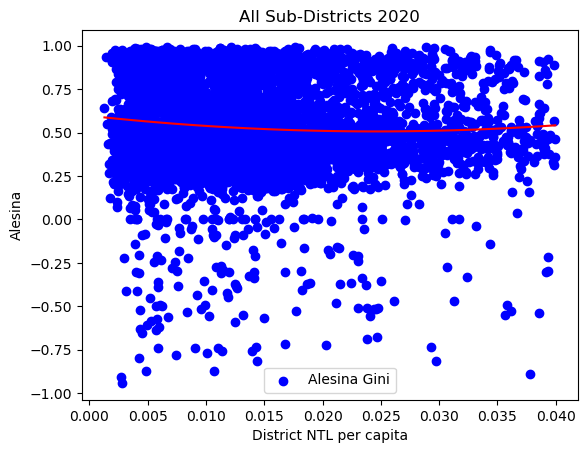

In [278]:
alo = alo[alo['dist_ntl_pc'] <= 0.04]
# Create a scatterplot
plt.scatter(alo['dist_ntl_pc'], alo['gini'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("Alesina")
plt.title("All Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(alo['dist_ntl_pc'], alo['gini'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(alo['dist_ntl_pc']), max(alo['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')

# Add a legend
plt.legend()
# Display the plot
plt.show()

# Sub_categories

In [45]:
columns_to_drop = ['202001','202002','202003','202004','202005','202006',
                   '202007','202008','202009','202010','202011','202012',
                   'avg_ntl','med_ntl','DTNAME','other_assembly_constituencies',
                   'ntl_adm','ntl_edu','ntl_med','ntl_pc_adm','ntl_pc_edu','ntl_pc_med',
                    ]

df21 = sub_sorted.drop(columns=columns_to_drop)


df21['str'] = df21['total_primary_school_students']/df21['total_primary_school_teachers']

df21

,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,subdist_area,dist_ntl_pc,pop_share,Index,Max_Len,str
498009,19.00000,WESTBENGAL,19.00000,303.00000,24 PARAGANAS NORTH,337.00000,2322.00000,Amdanga,2322.00000,322989.00000,Harapur,2723.00000,AMDANGA,19.00000,WEST BENGAL,303.00000,24 PARAGANAS NORTH,2322.00000,Amdanga,2723.00000,AMDANGA,107782.00000,MARICHA,Harapur,743711.00000,227.00000,1917.00000,2285.00000,1163.00000,1122.00000,437.00000,81.00000,45.00000,0,0,0,0,52.00000,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,127.00000,1,1,0,0,1,1,1,61.00000,3.00000,0,0,0,0.00000,0,0,0,0,0,1,1,62.00000,22.00000,37.00000,22.00000,0.00000,3.00000,0.00000,0.00000,34.00000,28.00000,42.00000,1,0,37.00000,22.00000,Haringhata,5.66798,1.25462,0,1,2,1,2,0,0.00185,1133.67593,220019.00000,97,132,127,65,144,165.84871,0.00515,0.01039,1,78,20.33333
498008,19.00000,WESTBENGAL,19.00000,303.00000,24 PARAGANAS NORTH,337.00000,2322.00000,Amdanga,2322.00000,323028.00000,Gajbanda,2723.00000,AMDANGA,19.00000,WEST BENGAL,303.00000,24 PARAGANAS NORTH,2322.00000,Amdanga,2723.00000,AMDANGA,107783.00000,SADHANPUR,Gajbanda,743221.00000,227.00000,1917.00000,2388.00000,1204.00000,1184.00000,482.00000,360.00000,122.00000,0,0,0,0,143.00

In [46]:
#Assuming df is your DataFrame
# Selecting the relevant columns
selected_columns = [
    'availability_of_primary_school',
    'is_primary_school_with_electricity',
    'primary_school_toilet',
    'is_primary_school_with_computer_lab',
    'is_primary_school_with_playground',
    'is_primary_school_have_drinking_water',
    'availability_of_mid_day_meal_scheme'
]

# Filtering rows based on the condition
filtered_rows = df21[df21['availability_of_primary_school'] < df21[selected_columns[1:]].max(axis=1)]

# Display the filtered rows
filtered_rows

,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,subdist_area,dist_ntl_pc,pop_share,Index,Max_Len,str
498007,19.00000,WESTBENGAL,19.00000,303.00000,24 PARAGANAS NORTH,337.00000,2322.00000,Amdanga,2322.00000,323018.00000,Hamidpur,2723.00000,AMDANGA,19.00000,WEST BENGAL,303.00000,24 PARAGANAS NORTH,2322.00000,Amdanga,2723.00000,AMDANGA,107781.00000,CHANDIGARH,Hamidpur,743166.00000,227.00000,1917.00000,1978.00000,1090.00000,888.00000,470.00000,372.00000,95.00000,0,0,0,0,145.60000,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,130.00000,0,1,1,1,1,1,1,0.00000,0.00000,1,0,0,125.00000,0,0,0,0,0,1,1,152.00000,152.00000,256.00000,152.00000,242.00000,7.00000,5.00000,4.00000,131.00000,125.00000,192.00000,1,0,260.00000,260.00000,Amdanga,6.45257,1.25176,2,1,2,0,2,0,0.00267,1133.67593,220019.00000,97,132,127,65,144,165.84871,0.00515,0.00899,6,78,NaN
498012,19.00000,WESTBENGAL,19.00000,303.00000,24 PARAGANAS NORTH,337.00000,2322.00000,Amdanga,2322.00000,322993.00000,Rajberia,2723.00000,AMDANGA,19.00000,WEST BENGAL,303.00000,24 PARAGANAS NORTH,2322.00000,Amdanga,2723.00000,AMDANGA,107782.00000,MARICHA,Rajberia,743711.00000,227.00000,1917.00000,1190.00000,603.00000,587.00000,255.00000,145.00000,107.00000,0,0,0,0,

In [47]:
# Align the DataFrame and recode values to 0 where they are greater than availability_of_primary_school
df21[selected_columns[1:]] = df21[selected_columns[1:]].where(
    df21[selected_columns[1:]].le(df21['availability_of_primary_school'], axis=0), 0
)

In [48]:
mer_cat = df21.groupby(['Subdistrict','District','District_code','State']).agg({ 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','area_sq_km':'sum',
                                                                               'total_hhd':'sum','total_hhd_engaged_in_farm_activities':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'availability_of_railway_station':'sum','availability_of_public_transport':'sum',
                                                                               'availability_of_primary_school':'sum', 
                                                                               'is_primary_school_with_electricity':'sum','primary_school_toilet':'sum',
                                                                               'is_primary_school_with_computer_lab':'sum','is_primary_school_with_playground':'sum',
                                                                               'is_primary_school_have_drinking_water':'sum','availability_of_mid_day_meal_scheme':'sum',
                                                                               'total_primary_school_students':'sum','total_primary_school_teachers':'sum',
                                                                               'availability_of_middle_school':'sum','availability_of_high_school':'sum',
                                                                               'availability_of_ssc_school':'sum','availability_of_govt_degree_college':'sum',
                                                                               'availability_of_phc_chc':'sum','availability_of_jan_aushadhi_kendra':'sum',
                                                                               'is_aanganwadi_centre_available':'sum','is_veterinary_hospital_available':'sum',
                                                                               'availability_of_internal_pucca_road':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'total_no_of_registered_children_in_anganwadi':'sum',
                                                                               'total_male_child_age_bw_0_6':'sum',	'total_female_child_age_bw_0_6':'sum',
                                                                               
                                                                               'nearest_urban_proximity':'mean','str':'mean',
                                                                               }).reset_index()
# mer_cat['avg_ntl'] = mer_cat['avg_ntl'].astype(float)
# mer_cat = mer_cat.rename(columns={'total_population': 'subdist_population',
#                                   'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum','transportadmin':'subdist_transportadmin_sum','area_sq_km':'subdist_area'})
# # mer_cat['dist_ntl_pc'] = mer_cat['subdist_ntl']/mer_cat['subdist_population']
# mer_all_cat = pd.merge(df21, mer_cat, on=['Subdistrict','District','District_code','State'], how='outer')
# mer_all_cat['pop_share'] = mer_all_cat['subdist_population']/mer_all_cat['subdist_population']
mer_cat

,Subdistrict,District,District_code,State,total_population,agro,med,edu,transportadmin,area_sq_km,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str
0,A.Konduru,KRISHNA,547.00000,ANDHRA PRADESH,48612.00000,66,52,42,35,66.57653,16043.00000,9587.00000,20,0,14,22,22,0,1,7,20,21,1654.00000,123.00000,10,7,3,0,4,2,22,9,15,2423.00000,1310.00000,1288.00000,4.39133,26.43259
1,ADILABAD URBAN,ADILABAD,532.00000,TELANGANA,538.00000,1,1,1,1,1.74309,172.00000,167.00000,1,0,0,1,1,0,0,0,0,1,19.00000,3.00000,0,0,0,0,0,0,1,0,0,39.00000,27.00000,15.00000,4.59984,6.33333
2,AIDILABAD RURAL,ADILABAD,532.00000,TELANGANA,32664.00000,36,46,56,23,95.19240,7951.00000,5591.00000,23,0,11,32,29,3,4,22,27,31,2438.00000,127.00000,13,7,4,0,1,0,31,1,29,2368.00000,1287.00000,1345.00000,3.11010,20.39735
3,ANANDPURI,BANSWARA,125.00000,RAJASTHAN,157564.00000,162,191,246,72,250.06270,32125.00000,23970.00000,103,1,22,118,52,1,6,102,113,112,10268.00000,459.00000,78,25,21,4,9,36,114,11,122,6045.00000,3193.00000,3764.00000,21.64914,26.67785
4,ANTHERGAON,PEDDAPALLI,0.00000,TELANGANA,22562.00000,54,32,29,22,43.85376,6637.00000,4040.00000,17,1,15,15,15,1,2,12,15,15,601.00000,49.00000,8,4,2,0,2,0,17,4,16,1112.00000,641.00000,634.00000,5.09413,12.87037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,pisimoni,Anirban,0.00000,WESTBENGAL,127107.00000,10,15,22,24,24.26537,32272.00000,402.00000,6,4,2,6,6,0,2,6,6,6,2196.00000,81.00000,5,6,5,0,0,1,6,2,6,3914.00000,3651.00000,3126.00000,2.01007,30.30479
5595,singhsingh,viewnew,0.00000,ANDHRA PRADESH,64319.00000,93,100,80,49,117.59500,19492.00000,9705.00000,37,0,22,51,44,3,5,20,45,50,2713.00000,162.00000,11,12,4,2,7,2,54,8,42,2999.00000,1671.00000,1665.00000,3.01630,19.55298
5596,subdistrict new,ALLAHABAD,175.00000,UTTAR PRADESH,1011.00000,1,1,1,1,1.61134,339.00000,261.00000,1,0,0,1,1,0,1,0,1,1,67.00000,3.00000,0,0,0,0,0,0,1,0,1,71.00000,39.00000,32.00000,7.42020,22.33333
5597,veppur,CUDDALORE,617.00000,TAMIL NADU,4453.00000,5,4,4,3,1.43577,1974.00000,5.00000,1,0,1,1,1,1,1,1,1,1,106.00000,4.00000,1,1,1,0,1,0,1,1,1,225.00000,125.00000,100.00000,16.99000,26.50000


In [49]:
panel_cat = pd.merge(panel, mer_cat, on=['Subdistrict','District','District_code','State'], how='right')
# panel_cat = panel_cat[panel_cat['dist_ntl_pc'] <= 0.04]
# panel_cat = panel_cat[panel_cat['alesina'] > 0]

panel_cat_t = pd.merge(panel_t, mer_cat, on=['Subdistrict','District','District_code','State'], how='right')
panel_cat_t = panel_cat_t[panel_cat_t['dist_ntl_pc'] <= 0.1]
# panel_cat_t = panel_cat_t[panel_cat_t['theil'] > 1]

panel_cat_w = pd.merge(panel_w, mer_cat, on=['Subdistrict','District','District_code','State'], how='right')
panel_cat_w = panel_cat_w[panel_cat_w['dist_ntl_pc'] <= 0.1]
# panel_cat_w = panel_cat_w[panel_cat_w['WCV'] > 1]
panel_cat_w = panel_cat_w[panel_cat_w['WCV'] <= 15]

panel_cat

,Subdistrict,District,District_code,State,subdist_ntl,subdist_population,dist_ntl_pc,sum_y,numerator,num,alesina,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,subdist_area,total_population,agro,med,edu,transportadmin,area_sq_km,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str
0,A.Konduru,KRISHNA,547.00000,ANDHRA PRADESH,1562.69600,48612.00000,0.03215,0.92292,6.12607,22.00000,0.44203,66,52,42,35,35,66.57653,48612.00000,66,52,42,35,66.57653,16043.00000,9587.00000,20,0,14,22,22,0,1,7,20,21,1654.00000,123.00000,10,7,3,0,4,2,22,9,15,2423.00000,1310.00000,1288.00000,4.39133,26.43259
1,ADILABAD URBAN,ADILABAD,532.00000,TELANGANA,10.55057,538.00000,0.01961,0.01961,0.01961,1.00000,0.00000,1,1,1,1,1,1.74309,538.00000,1,1,1,1,1.74309,172.00000,167.00000,1,0,0,1,1,0,0,0,0,1,19.00000,3.00000,0,0,0,0,0,0,1,0,0,39.00000,27.00000,15.00000,4.59984,6.33333
2,AIDILABAD RURAL,ADILABAD,532.00000,TELANGANA,1105.03880,32664.00000,0.03383,1.62243,17.07848,34.00000,0.41021,36,46,56,23,52,95.19240,32664.00000,36,46,56,23,95.19240,7951.00000,5591.00000,23,0,11,32,29,3,4,22,27,31,2438.00000,127.00000,13,7,4,0,1,0,31,1,29,2368.00000,1287.00000,1345.00000,3.11010,20.39735
3,ANANDPURI,BANSWARA,125.00000,RAJASTHAN,1295.66706,157564.00000,0.00822,1.04621,48.86107,122.00000,0.24257,162,191,246,72,225,250.06270,157564.00000,162,191,246,72,250.06270,32125.00000,23970.00000,103,1,22,118,52,1,6,102,113,112,10268.00000,459.00000,78,25,21,4,9,36,114,11,122,6045.00000,3193.00000,3764.00000,21.64914,26.67785
4,ANTHERGAON,PEDDAPALLI,0.00000,TELANGANA,1156.18224,22562.00000,0.05124,0.97772,5.33485,17.00000,0.41689,54,32,29,22,33,43.85376,22562.00000,54,32,29,22,43.85376,6637.00000,4040.00000,17,1,15,15,15,1,2,12,15,15,601.00000,49.00000,8,4,2,0,2,0,17,4,16,1112.00000,641.00000,634.00000,5.09413,12.87037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,pisimoni,Anirban,0.00000,WESTBENGAL,4233.69165,127107.00000,0.03331,0.19870,0.50546,6.00000,0.31872,10,15,22,24,12,24.26537,127107.00000,10,15,22,24,24.26537,32272.00000,402.00000,6,4,2,6,6,0,2,6,6,6,2196.00000,81.00000,5,6,5,0,0,1,6,2,6,3914.00000,3651.00000,3126.00000,2.01007,30.30479
5595,singhsingh,viewnew,0.00000,ANDHRA PRADESH,2270.92356,64319.00000,0.03531,2.39675,29.41035,61.00000,0.61407,93,100,80,49,79,117.59500,64319.00000,93,100,80,49,117.59500,19492.00000,9705.00000,37,0,22,51,44,3,5,20,45,50,2713.00000,162.00000,11,12,4,2,7,2,54,8,42,2999.00000,1671.00000,1665.00000,3.01630,19.55298
5596,subdistrict new,ALLAHABAD,175.00000,UTTAR PRADESH,25.33902,1011.00000,0.02506,0.02506,0.02506,1.00000,0.00000,1,1,1,1,2,1.61134,1011.00000,1,1,1,1,1.61134,339.00000,261.00000,1,0,0,1,1,0,1,0,1,1,67.00000,3.00000,0,0,0,0,0,0,1,0,1,71.00000,39.00000,32.00000,7.42020,22.33333
5597,veppur,CUDDALORE,617.00000,TAMIL NADU,48.19620,4453.00000,0.01082,0.01082,0.01082,1.00000,0.00000,5,4,4,3,2,1.43577,4453.00000,5,4,4,3,1.43577,1974.00000,5.00000,1,0,1,1,1,1,1,1,1,1,106.00000,4.00000,1,1,1,0,1,0,1,1,1,225.00000,125.00000,100.00000,16.99000

In [50]:
# Get unique values from a specific column
unique_values = panel_cat['State'].unique()
print(unique_values)

# Create a mapping dictionary
region_mapping = {
    'south': ['ANDHRA PRADESH', 'TELANGANA', 'KERALA', 'KARNATAKA', 'TAMIL NADU', 'ANDAMAN AND NICOBAR ISLANDS'],
    'west': ['RAJASTHAN', 'MAHARASHTRA', 'GUJARAT','GOA'],
    'central': ['ODISHA', 'CHHATTISGARH', 'BIHAR', 'JHARKHAND', 'MADHYA PRADESH', 'UTTAR PRADESH'],
    'east': ['ASSAM', 'WESTBENGAL', 'TRIPURA'],
    'north': ['UTTARAKHAND', 'PUNJABB', 'HARYANA']
}

zonal_mapping = {
    'south': ['ANDHRA PRADESH', 'TELANGANA', 'KERALA', 'KARNATAKA', 'TAMIL NADU', 'ANDAMAN AND NICOBAR ISLANDS'],
    'west': ['MAHARASHTRA', 'GUJARAT','GOA'],
    'central': ['UTTARAKHAND', 'CHHATTISGARH', 'MADHYA PRADESH', 'UTTAR PRADESH'],
    'east': ['ODISHA', 'ASSAM', 'WESTBENGAL', 'TRIPURA', 'BIHAR', 'JHARKHAND'],
    'north': ['RAJASTHAN',  'PUNJABB', 'HARYANA']
}

# Use the map function to create the 'Region' column
panel_cat['Region'] = panel_cat['State'].map({state: region for region, states in region_mapping.items() for state in states})
panel_cat['Zone'] = panel_cat['State'].map({state: region for region, states in zonal_mapping.items() for state in states})
panel_cat_w['Zone'] = panel_cat_w['State'].map({state: region for region, states in zonal_mapping.items() for state in states})


['ANDHRA PRADESH' 'TELANGANA' 'RAJASTHAN' 'ODISHA' 'TAMIL NADU' 'GUJARAT'
 'CHHATTISGARH' 'PUNJABB' 'MAHARASHTRA' 'HARYANA' 'BIHAR' 'UTTARAKHAND'
 'JHARKHAND' 'KERALA' 'KARNATAKA' 'ASSAM' 'MADHYA PRADESH' 'UTTAR PRADESH'
 'WESTBENGAL' 'TRIPURA' 'GOA' 'ANDAMAN AND NICOBAR ISLANDS']


In [51]:
panel_cat['no_1000s'] = panel_cat['subdist_population']/1000

panel_cat['edu_per_1000']= panel_cat['subdist_edu_sum']/panel_cat['no_1000s']
panel_cat['adm_per_1000']= panel_cat['subdist_transportadmin_sum']/panel_cat['no_1000s']
panel_cat['arg_per_1000']= panel_cat['subdist_agro_sum']/panel_cat['no_1000s']
panel_cat['no_1000_students'] = panel_cat['total_primary_school_students']/1000
panel_cat['primaryschool_per_100']= panel_cat['availability_of_primary_school']/panel_cat['no_1000_students']


panel_cat['children_bw_0_6']= panel_cat['total_male_child_age_bw_0_6'] + panel_cat['total_female_child_age_bw_0_6']
panel_cat['med_per_1000']= panel_cat['subdist_med_sum']/panel_cat['no_1000s']
panel_cat['phc_per_1000']= panel_cat['availability_of_phc_chc']/panel_cat['no_1000s']
panel_cat['veter_per_1000'] = panel_cat['is_veterinary_hospital_available']/panel_cat['no_1000s']
panel_cat['no_100_kids'] = panel_cat['children_bw_0_6']/100
panel_cat['no_100_kids_reg'] = panel_cat['total_no_of_registered_children_in_anganwadi']/100
panel_cat['aanganwadi_per_100']= panel_cat['is_aanganwadi_centre_available']/panel_cat['no_100_kids']
panel_cat['aanganwadi_per_100_reg']= panel_cat['is_aanganwadi_centre_available']/panel_cat['no_100_kids_reg']

panel_cat['share_roads'] = panel_cat['is_village_connected_to_all_weather_road']/panel_cat['num']
panel_cat['share_rails'] = panel_cat['availability_of_railway_station']/panel_cat['num']
panel_cat['share_pubtn'] = panel_cat['availability_of_public_transport']/panel_cat['num']
panel_cat['ps_share_elec'] = panel_cat['is_primary_school_with_electricity']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_toil'] = panel_cat['primary_school_toilet']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_clab'] = panel_cat['is_primary_school_with_computer_lab']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_play'] = panel_cat['is_primary_school_with_playground']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_dwat'] = panel_cat['is_primary_school_have_drinking_water']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_meal'] = panel_cat['availability_of_mid_day_meal_scheme']/panel_cat['availability_of_primary_school']
						

panel_cat

,Subdistrict,District,District_code,State,subdist_ntl,subdist_population,dist_ntl_pc,sum_y,numerator,num,alesina,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,subdist_area,total_population,agro,med,edu,transportadmin,area_sq_km,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str,Region,Zone,no_1000s,edu_per_1000,adm_per_1000,arg_per_1000,no_1000_students,primaryschool_per_100,children_bw_0_6,med_per_1000,phc_per_1000,veter_per_1000,no_100_kids,no_100_kids_reg,aanganwadi_per_100,aanganwadi_per_100_reg,share_roads,share_rails,share_pubtn,ps_share_elec,ps_share_toil,ps_share_clab,ps_share_play,ps_share_dwat,ps_share_meal
0,A.Konduru,KRISHNA,547.00000,ANDHRA PRADESH,1562.69600,48612.00000,0.03215,0.92292,6.12607,22.00000,0.44203,66,52,42,35,35,66.57653,48612.00000,66,52,42,35,66.57653,16043.00000,9587.00000,20,0,14,22,22,0,1,7,20,21,1654.00000,123.00000,10,7,3,0,4,2,22,9,15,2423.00000,1310.00000,1288.00000,4.39133,26.43259,south,south,48.61200,0.86398,0.71999,1.35769,1.65400,13.30109,2598.00000,1.06969,0.08228,0.18514,25.98000,24.23000,0.84681,0.90797,0.90909,0.00000,0.63636,1.00000,0.00000,0.04545,0.31818,0.90909,0.95455
1,ADILABAD URBAN,ADILABAD,532.00000,TELANGANA,10.55057,538.00000,0.01961,0.01961,0.01961,1.00000,0.00000,1,1,1,1,1,1.74309,538.00000,1,1,1,1,1.74309,172.00000,167.00000,1,0,0,1,1,0,0,0,0,1,19.00000,3.00000,0,0,0,0,0,0,1,0,0,39.00000,27.00000,15.00000,4.59984,6.33333,south,south,0.53800,1.85874,1.85874,1.85874,0.01900,52.63158,42.00000,1.85874,0.00000,0.00000,0.42000,0.39000,2.38095,2.56410,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,AIDILABAD RURAL,ADILABAD,532.00000,TELANGANA,1105.03880,32664.00000,0.03383,1.62243,17.07848,34.00000,0.41021,36,46,56,23,52,95.19240,32664.00000,36,46,56,23,95.19240,7951.00000,5591.00000,23,0,11,32,29,3,4,22,27,31,2438.00000,127.00000,13,7,4,0,1,0,31,1,29,2368.00000,1287.00000,1345.00000,3.11010,20.39735,south,south,32.66400,1.71443,0.70414,1.10213,2.43800,13.12551,2632.00000,1.40828,0.03061,0.03061,26.32000,23.68000,1.17781,1.30912,0.67647,0.00000,0.32353,0.90625,0.09375,0.12500,0.68750,0.84375,0.96875
3,ANANDPURI,BANSWARA,125.00000,RAJASTHAN,1295.66706,157564.00000,0.00822,1.04621,48.86107,122.00000,0.24257,162,191,246,72,225,250.06270,157564.00000,162,191,246,72,250.06270,32125.00000,23970.00000,103,1,22,118,52,1,6,102,113,112,10268.00000,459.00000,78,25,21,4,9,36,114,11,122,6045.00000,3193.00000,3764.00000,21.64914,26.67785,west,north,157.56400,1.56127,0.45696,1.02815,10.26800,11.49201,6957.00000,1.21221,0.05712,0.06981,69.57000,60.45000,1.63864,1.88586,0.84426,0.00820,0.18033,0.44068,0.00847,0.05085,0.86441,0.95763,0.94915
4,ANTHERGAON,PEDDAPALLI,0.00000,TELANGANA,1156.18224,22562.00000,0.05124,0.97772,5.33485,17.00000,0.41689,54,32,29,22,33,43.85376,22562.00000,54,32,29,22,43.85376,6637.00000,4040.00000,17,1,15,15,15,1,2,12,15,15,601.00000,49.00000,8,4,2,0,2,0,17,4,16,1112.00000,641.00000,634.00000,5.09413,12.87037,south,south,22.56200,1.28535,0.97509,2.39340,0.60100,24.95840,1275.00000,1.41831,0.08864,0.17729,12.75000,11.12000,1.33333,1.52878,1.00000,0.05882,0.88235,1.00000,0.06667,0.13333,0.80000,1.00000,1.00000


In [52]:
panel_cat_w['no_1000s'] = panel_cat_w['subdist_population']/1000

panel_cat_w['edu_per_1000']= panel_cat_w['subdist_edu_sum']/panel_cat_w['no_1000s']
panel_cat_w['adm_per_1000']= panel_cat_w['subdist_transportadmin_sum']/panel_cat_w['no_1000s']
panel_cat_w['arg_per_1000']= panel_cat_w['subdist_agro_sum']/panel_cat_w['no_1000s']
panel_cat_w['no_1000_students'] = panel_cat_w['total_primary_school_students']/1000
panel_cat_w['primaryschool_per_100']= panel_cat_w['availability_of_primary_school']/panel_cat_w['no_1000_students']


panel_cat_w['children_bw_0_6']= panel_cat_w['total_male_child_age_bw_0_6'] + panel_cat_w['total_female_child_age_bw_0_6']
panel_cat_w['med_per_1000']= panel_cat_w['subdist_med_sum']/panel_cat_w['no_1000s']
panel_cat_w['phc_per_1000']= panel_cat_w['availability_of_phc_chc']/panel_cat_w['no_1000s']
panel_cat_w['veter_per_1000'] = panel_cat_w['is_veterinary_hospital_available']/panel_cat_w['no_1000s']
panel_cat_w['no_100_kids'] = panel_cat_w['children_bw_0_6']/100
panel_cat_w['no_100_kids_reg'] = panel_cat_w['total_no_of_registered_children_in_anganwadi']/100
panel_cat_w['aanganwadi_per_100']= panel_cat_w['is_aanganwadi_centre_available']/panel_cat_w['no_100_kids']
panel_cat_w['aanganwadi_per_100_reg']= panel_cat_w['is_aanganwadi_centre_available']/panel_cat_w['no_100_kids_reg']

panel_cat_w['share_roads'] = panel_cat_w['is_village_connected_to_all_weather_road']/panel_cat_w['num']
panel_cat_w['share_rails'] = panel_cat_w['availability_of_railway_station']/panel_cat_w['num']
panel_cat_w['share_pubtn'] = panel_cat_w['availability_of_public_transport']/panel_cat_w['num']


In [53]:
panel_cat_t['no_1000s'] = panel_cat_t['subdist_population']/1000

panel_cat_t['edu_per_1000']= panel_cat_t['subdist_edu_sum']/panel_cat_t['no_1000s']
panel_cat_t['adm_per_1000']= panel_cat_t['subdist_transportadmin_sum']/panel_cat_t['no_1000s']
panel_cat_t['arg_per_1000']= panel_cat_t['subdist_agro_sum']/panel_cat_t['no_1000s']
panel_cat_t['no_1000_students'] = panel_cat_t['total_primary_school_students']/1000
panel_cat_t['primaryschool_per_100']= panel_cat_t['availability_of_primary_school']/panel_cat_t['no_1000_students']


panel_cat_t['children_bw_0_6']= panel_cat_t['total_male_child_age_bw_0_6'] + panel_cat_t['total_female_child_age_bw_0_6']
panel_cat_t['med_per_1000']= panel_cat_t['subdist_med_sum']/panel_cat_t['no_1000s']
panel_cat_t['phc_per_1000']= panel_cat_t['availability_of_phc_chc']/panel_cat_t['no_1000s']
panel_cat_t['veter_per_1000'] = panel_cat_t['is_veterinary_hospital_available']/panel_cat_t['no_1000s']
panel_cat_t['no_100_kids'] = panel_cat_t['children_bw_0_6']/100
panel_cat_t['no_100_kids_reg'] = panel_cat_t['total_no_of_registered_children_in_anganwadi']/100
panel_cat_t['aanganwadi_per_100']= panel_cat_t['is_aanganwadi_centre_available']/panel_cat_t['no_100_kids']
panel_cat_t['aanganwadi_per_100_reg']= panel_cat_t['is_aanganwadi_centre_available']/panel_cat_t['no_100_kids_reg']

panel_cat_t['share_roads'] = panel_cat_t['is_village_connected_to_all_weather_road']/panel_cat_t['num']
panel_cat_t['share_rails'] = panel_cat_t['availability_of_railway_station']/panel_cat_t['num']
panel_cat_t['share_pubtn'] = panel_cat_t['availability_of_public_transport']/panel_cat_t['num']


In [54]:
print(panel_cat['subdist_population'].median())
print(panel_cat['total_population'].mean())
print(panel_cat['num'].mean())


126705.0
169992.57903197
106.83425611716378


# State Gini

In [150]:
mer_s = meg.groupby(['State']).agg({'avg_ntl': 'sum', 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','road':'sum','area_sq_km':'sum'}).reset_index()
mer_s['avg_ntl'] = mer_s['avg_ntl'].astype(float)
mer_s = mer_s.rename(columns={'avg_ntl': 'state_ntl', 'total_population': 'state_population',
                                  'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum',
                                  'transportadmin':'subdist_transportadmin_sum','area_sq_km':'subdist_area',
                                  'road':'villages_road'})
mer_s['state_ntl_pc'] = mer_s['state_ntl']/mer_s['state_population']
mer_all_s = pd.merge(meg, mer_s, on=['State'], how='outer')
mer_all_s['pop_share'] = mer_all_s['total_population']/mer_all_s['state_population']
mer_all_s

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,state_ntl,state_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,subdist_area,state_ntl_pc,pop_share
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,0,0,0,0,56.69000,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,14.00000,1,1,0,0,0,1,1,17.00000,4.00000,0,0,0,0.00000,0,0,1,0,0,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,1,0,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,0.11152,0.08439,0.02094,4255.10544,202987.00000,609,407,315,256,299,192.72702,0.02096,0.00195
1,0.0000

In [151]:
s_sorted = mer_all_s.sort_values(by=['State','ntl_pc'])
s_sorted['Index'] = s_sorted.groupby('State').cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
s_sorted['Max_Len'] = s_sorted.groupby('State')['Index'].transform('max')
s_sorted

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,state_ntl,state_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,subdist_area,state_ntl_pc,pop_share,Index,Max_Len
179,0.00000,0.02821,0.03614,0.03614,0.01851,0.03350,0.00970,0.02733,0.00000,0.02644,0.02644,0.01763,0.02781,0.02733,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5920.00000,Mayabunder,5920.00000,645300.00000,Lataw (RV),6495.00000,MAYABUNDER,35.00000,ANDAMAN AND NICOBAR ISLANDS,632.00000,NORTH AND MIDDLE ANDAMAN,5920.00000,Mayabunder,6495.00000,MAYABUNDER,234503.00000,RAMPUR,Lataw (RV),744204.00000,543.00000,NaN,NaN,648.00000,328.00000,320.00000,155.00000,85.00000,70.00000,0,0,0,0,30.35000,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,12.00000,0,1,1,1,1,1,1,0.00000,0.00000,0,0,0,0.00000,0,0,1,1,0,1,1,15.00000,12.00000,1.00000,10.00000,0.00000,0.00000,0.00000,0.00000,19.00000,13.00000,48.00000,0,0,12.00000,10.00000,Mayabunder,5.19691,0.61494,0,0,2,1,1,2,0.00004,0.00145,0.00110,0.00027,0.00000,0.00000,0.00000,4255.10544,202987.00000,609,407,315,256,299,192.72702,0.02096,0.00319,1,18

In [154]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale_s = s_sorted.groupby(['State',
                          'state_ntl','state_population',
                          'state_ntl_pc']).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale_s.columns = ['State','state_ntl',
               'state_population','state_ntl_pc','sum_y','numerator', 'num','alesina']
ale_s

,State,state_ntl,state_population,state_ntl_pc,sum_y,numerator,num,alesina
0,ANDAMAN AND NICOBAR ISLANDS,4255.10544,202987.00000,0.02096,7.47328,127.05445,180.00000,0.81665
1,ANDHRA PRADESH,702393.05979,38907953.00000,0.01805,1153.05139,1728312.45506,17019.00000,0.82391
2,ASSAM,209933.43898,26248649.00000,0.00800,1120.11641,634283.81069,15928.00000,0.92896
3,BIHAR,631846.36680,126585181.00000,0.00499,8804.50579,7665709.09389,43772.00000,0.96024
4,CHHATTISGARH,360720.39705,22064365.00000,0.01635,870.82773,1663195.38667,17662.00000,0.78378
5,GOA,18927.91919,1035210.00000,0.01828,40.11081,968.69148,323.00000,0.85356
6,GUJARAT,746322.90349,39781687.00000,0.01876,516.18957,1831672.27734,18026.00000,0.60635
7,HARYANA,344076.03613,20847879.00000,0.01650,4800.38134,317734.16350,6561.00000,0.97998
8,JHARKHAND,336805.93059,31838519.00000,0.01058,2309.36481,3499958.15703,29124.00000,0.89596
9,KARNATAKA,569183.29912,39316683.00000,0.01448,1706.29743,3352417.16007,23484.00000,0.83272


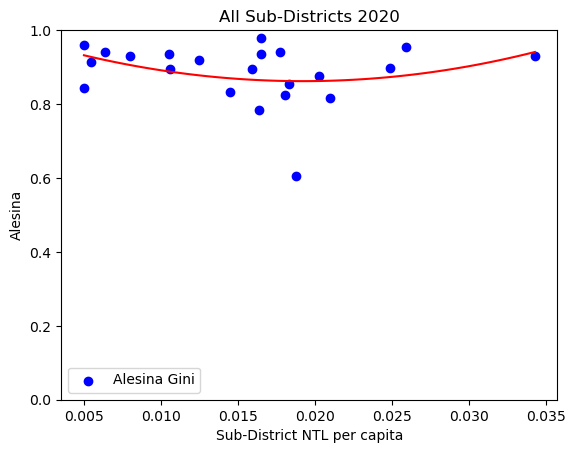

In [156]:
plt.scatter(ale_s['state_ntl_pc'], ale_s['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Alesina")
plt.title("All Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale_s['state_ntl_pc'], ale_s['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale_s['state_ntl_pc']), max(ale_s['state_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
plt.ylim(0,1)

# Add a legend
plt.legend()
# Display the plot
plt.show()

# Export

In [55]:
panel_cat.to_csv('/Users/sid/Desktop/2020catdata.csv',index=False)
panel_cat_t.to_csv('/Users/sid/Desktop/2020cat_t_data.csv',index=False)
panel_cat_w.to_csv('/Users/sid/Desktop/2020cat_w_data.csv',index=False)